<a href="https://colab.research.google.com/github/mzucali/didactics/blob/main/ZinggFlinnPRG_StatsPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*ZINGG FLINN PGR plots of Eigenvalues*

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import math
from pandas import read_csv, read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import io

In [ ]:
# load and read summary file from EMPA
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
data = read_excel(fn)

In [17]:
data.head()

,dataset,N,S1(eigenV),S2,S3,S1/S2,S2/S3,C,k,S2/S1,S3/S2,P (S1-S2),G (2*(S2-S3)),R (3*S3),cyl (P+G),test (P+G+R=1),Unnamed: 16,Unnamed: 17
0,e1ss,62,0.5843,0.4012,0.0144,1.456381,27.861111,40.576389,0.052273,0.686634,0.035892,0.1831,0.7736,0.0432,0.9567,0.9999,0.163275,1.444998


FLINN PLOT

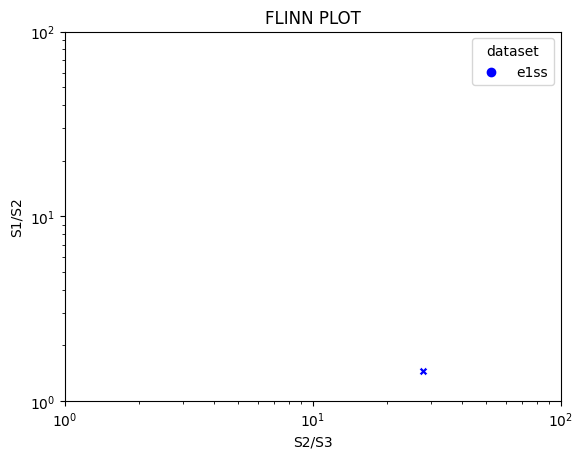

In [34]:
sns.scatterplot(data=data, x="S2/S3", y="S1/S2", hue="dataset", marker="X", palette=['blue']).set_title('FLINN PLOT')
# control x and y limits
plt.ylim(10**0, 10**2)
plt.xlim(10**0, 10**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

ZINGG PLOT

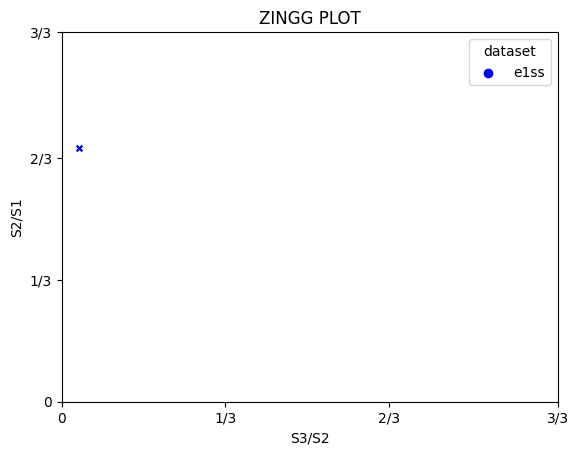

In [33]:
sns.scatterplot(data=data, x="S3/S2", y="S2/S1", hue="dataset", marker="X", palette=['blue']).set_title('ZINGG PLOT')
# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1)
#plt.set_yticks(range(len(data)-5))
#plt.xscale('log')
#plt.yscale('log')
# specify positions of ticks on x-axis and y-axis
plt.xticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.yticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.show()

PGR VOLLMER PLOT

In [35]:
import plotly.express as px

In [36]:
fig = px.scatter_ternary(data, a="P (S1-S2)", b="G (2*(S2-S3))", c="R (3*S3)")
fig.show()